<a href="https://colab.research.google.com/github/aabarzu/Ejercicio-de-visualizaci-n-de-datos/blob/main/BikeCollisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bike Collisions**

**Carga de Datos**

In [110]:
from google.colab import drive
drive.mount('/content/drive') #  force_remount=True , pide eso no sé porqué
import pandas as pd

filename = '/content/drive/MyDrive/CodingDojo/DataScience/PandasForDataManipulation/Datos/Bike Collisions.xlsx' # Excel

df = pd.read_excel(filename) # Excel

df.head() 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Accident Index,Date,Borough,Ward,Latitude,Longitude,Casualties,Severity,Url,Api Url,Number of Casualties,Number of Vehicles
0,2019010161545,2019-02-04 19:55:00,Hounslow,Heston Central,51.475300,-0.375342,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2
1,2019010191515,2019-07-04 15:09:00,Lambeth,Clapham Town,51.468211,-0.144234,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2
2,2019010209381,2019-10-03 17:05:00,Hillingdon,Northwood,51.612605,-0.434904,"Pedestrian,Cyclist",fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,2,1
3,2019010214996,2019-10-30 06:39:00,Lewisham,Rushey Green,51.444015,-0.026135,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,2
4,2019010254652,2019-02-09 08:40:00,Camden,West Hampstead,51.550844,-0.191400,Cyclist,fatal,https://www.cyclestreets.net/collisions/report...,https://api.cyclestreets.net/v2/collisions.loc...,1,1


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61046 entries, 0 to 61045
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Accident Index        61046 non-null  object        
 1   Date                  61046 non-null  datetime64[ns]
 2   Borough               61046 non-null  object        
 3   Ward                  61046 non-null  object        
 4   Latitude              61046 non-null  float64       
 5   Longitude             61046 non-null  float64       
 6   Casualties            61046 non-null  object        
 7   Severity              61046 non-null  object        
 8   Url                   61046 non-null  object        
 9   Api Url               61046 non-null  object        
 10  Number of Casualties  61046 non-null  int64         
 11  Number of Vehicles    61046 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 5.6+ M

In [166]:
df.groupby(['Borough']).count()['Number of Casualties'].sort_values(ascending=False).head()

Borough
Westminster    5219
Southwark      4100
Lambeth        4063
Wandsworth     3714
Islington      3382
Name: Number of Casualties, dtype: int64

In [112]:
df.describe()

,Latitude,Longitude,Number of Casualties,Number of Vehicles
count,61046.000000,61046.000000,61046.000000,61046.000000
mean,51.501731,-0.129749,1.035596,1.972938
std,0.055215,0.111756,0.195185,0.266922
min,51.295232,-0.509746,1.000000,1.000000
25%,51.468743,-0.188045,1.000000,2.000000
50%,51.506667,-0.120515,1.000000,2.000000
75%,51.535433,-0.070981,1.000000,2.000000
max,51.684432,0.301900,6.000000,6.000000


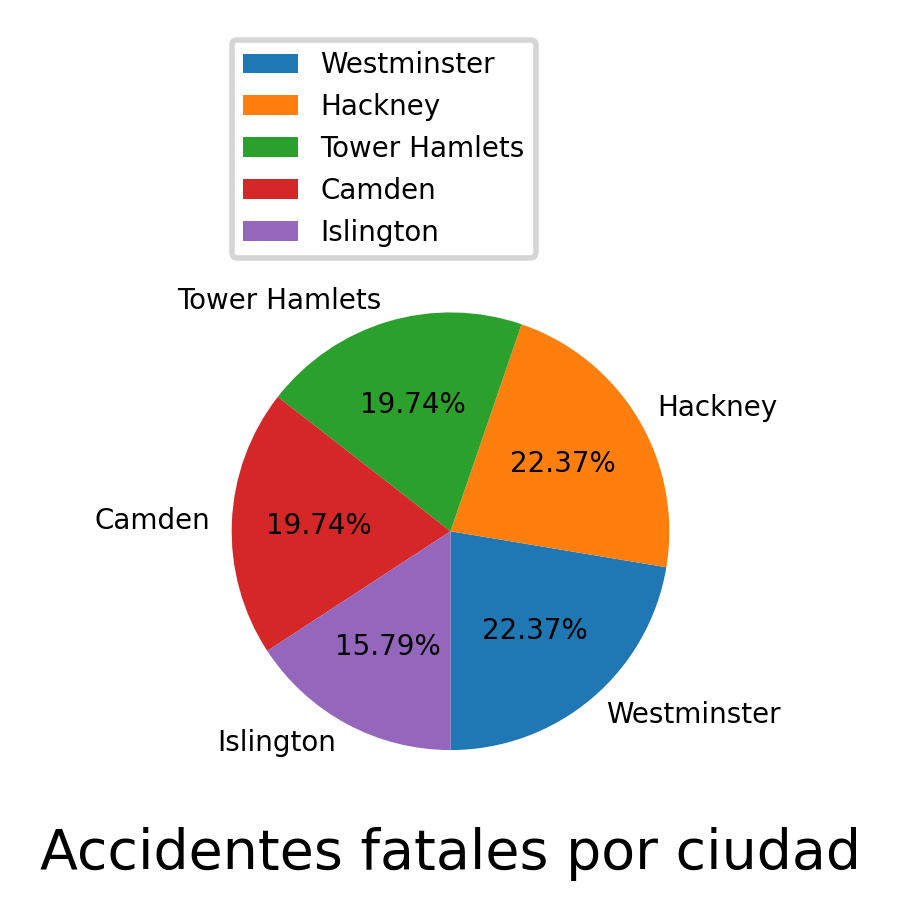

In [181]:
# importing package
import matplotlib.pyplot as plt

filtro = df['Severity']=='fatal'  
data_grafo_ch= df[filtro].groupby(['Borough']).count()['Number of Casualties'].sort_values(ascending=False).head()
fig1 = plt.figure(dpi=400)
ax1 = fig1.add_subplot(1,3,2)
textprops = {"fontsize":5}
ax1.pie(data_grafo_ch,  autopct="%.2f%%", shadow = False, startangle=-90 , labels=data_grafo_ch.index , textprops =textprops)
ax1.set_xlabel('Accidentes fatales por ciudad');
ax1.legend( prop={'size': 5} , loc=[0.1,1]);
plt.show();